In [1]:
from ucimlrepo import fetch_ucirepo 
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
# fetch dataset 
secondary_mushroom = fetch_ucirepo(id=848) 
  
# data (as pandas dataframes) 
X = secondary_mushroom.data.features 
y = secondary_mushroom.data.targets 

df = pd.concat([X, y], axis=1)
# metadata 
print(secondary_mushroom.metadata) 
  
# variable information 
print(secondary_mushroom.variables) 

{'uci_id': 848, 'name': 'Secondary Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/848/data.csv', 'abstract': 'Dataset of simulated mushrooms for binary classification into edible and poisonous.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 61068, 'num_features': 20, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2021, 'last_updated': 'Wed Apr 10 2024', 'dataset_doi': '10.24432/C5FP5Q', 'creators': ['Dennis Wagner', 'D. Heider', 'Georges Hattab'], 'intro_paper': {'ID': 259, 'type': 'NATIVE', 'title': 'Mushroom data creation, curation, and simulation to support classification tasks', 'authors': 'Dennis Wagner, D. Heider, Georges Hattab', 'venue': 'Scientific Reports', 'year': 2021, 'journal': None, '

Missing Value Counts:
cap-surface          14120
gill-attachment       9884
gill-spacing         25063
stem-root            51538
stem-surface         38124
veil-type            57892
veil-color           53656
ring-type             2471
spore-print-color    54715
dtype: int64


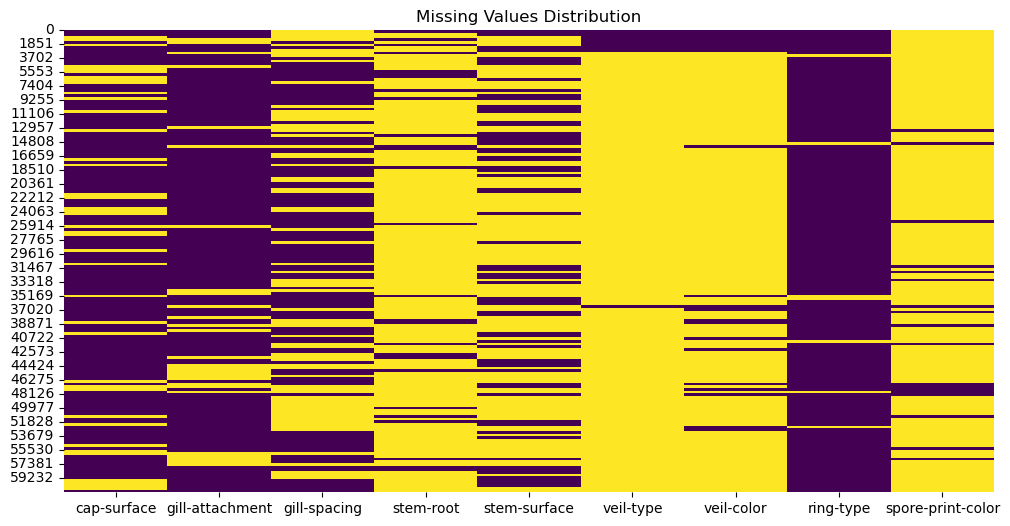

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Identify Missing Values
# -------------------------------------------------
# Get columns with missing values from metadata
missing_cols = [
    'cap-surface', 'gill-attachment', 'gill-spacing',
    'stem-root', 'stem-surface', 'veil-type',
    'veil-color', 'ring-type', 'spore-print-color'
]

print("Missing Value Counts:")
print(df[missing_cols].isnull().sum())

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df[missing_cols].isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Distribution')
plt.show()

In [5]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class MushroomImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mode_values = {}
        self.high_missing_cols = [
            'stem-root', 'veil-type', 'veil-color',
            'spore-print-color', 'stem-surface', 'gill-spacing'
        ]
        self.moderate_missing_cols = ['cap-surface', 'gill-attachment']
        self.low_missing_cols = ['ring-type']

    def fit(self, X, y=None):
        # Store modes for different categories
        self.mode_values = {
            'low': X[self.low_missing_cols].mode().iloc[0].to_dict(),
            'moderate': X[self.moderate_missing_cols].mode().iloc[0].to_dict(),
            'high': {col: 'Missing' for col in self.high_missing_cols}
        }
        return self

    def transform(self, X):
        X = X.copy()
        
        # Low missingness: Simple mode imputation
        for col in self.low_missing_cols:
            X[col] = X[col].fillna(self.mode_values['low'][col])
        
        # Moderate missingness: Mode imputation + missing flag
        for col in self.moderate_missing_cols:
            X[col+'_missing'] = X[col].isnull().astype(int)
            X[col] = X[col].fillna(self.mode_values['moderate'][col])
        
        # High missingness: 'Missing' category
        for col in self.high_missing_cols:
            X[col] = X[col].astype('category')
            X[col] = X[col].cat.add_categories('Missing')
            X[col] = X[col].fillna('Missing')  # Removed extra 'x'
        
        return X

# Usage example:
imputer = MushroomImputer()
df_processed = imputer.fit_transform(df)

print("Imputation Strategy Summary:")
print("1. ring-type (4% missing): Mode imputation")
print("2. cap-surface/gill-attachment (~20%): Mode + missing flag")
print("3. High-missing features (>30%): 'Missing' category")
print("4. Consider removing veil-type (95% missing) after evaluation")

Imputation Strategy Summary:
1. ring-type (4% missing): Mode imputation
2. cap-surface/gill-attachment (~20%): Mode + missing flag
3. High-missing features (>30%): 'Missing' category
4. Consider removing veil-type (95% missing) after evaluation


In [7]:
print(df_processed.columns)

Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season', 'class', 'cap-surface_missing',
       'gill-attachment_missing'],
      dtype='object')


In [9]:
# # !pip install scikit-learn
# !pip install --upgrade scikit-learn
# import sklearn
# print(sklearn.__version__)
# !pip uninstall scikit-learn
# !pip install scikit-learn --upgrade

In [15]:
# !pip install yellowbrick

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

In [19]:
# Load preprocessed data (assuming df_processed exists)
# X = df_processed.drop('class', axis=1)  # Exclude target variable

# 1. Preprocessing for Clustering
# -------------------------------------------------
# Convert categorical features to numeric (if not already done)
categorical_cols = df_processed.select_dtypes(['category', 'object']).columns
for col in categorical_cols:
    df_processed[col] = pd.factorize(df_processed[col])[0]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_processed.drop('class', axis=1))


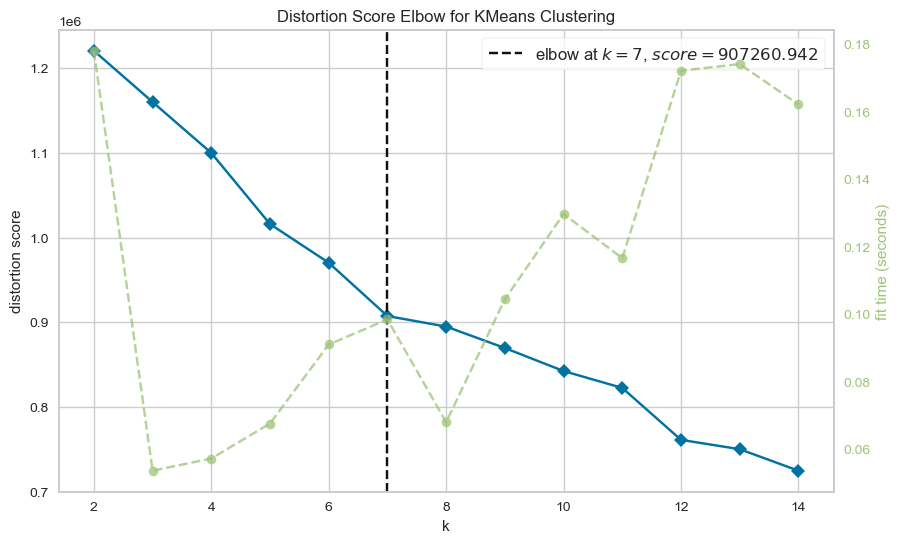

KeyboardInterrupt: 

In [51]:

# 2. K-Means Clustering with Optimal K
# -------------------------------------------------
# Elbow Method
plt.figure(figsize=(10,6))
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2,15))
visualizer.fit(X_scaled)
visualizer.show()

# Silhouette Analysis
silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, preds)
    silhouette_scores.append(score)

plt.figure(figsize=(10,6))
plt.plot(range(2,15), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# Final K-means
optimal_k = 4  # Update based on elbow/silhouette results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# 3. DBSCAN Clustering
# -------------------------------------------------
# Find optimal eps using k-distance graph
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5)
nbrs = nn.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
distances = np.sort(distances[:,4], axis=0)

plt.figure(figsize=(10,6))
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Epsilon')
plt.title('K-Distance Graph for DBSCAN')
plt.show()

# Final DBSCAN (adjust eps based on knee point)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)



In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Silhouette Score (already implemented)
print(f"K-means Silhouette: {silhouette_score(X_scaled, kmeans_labels):.3f}")

# Davies-Bouldin Index (lower = better)
print(f"K-means Davies-Bouldin: {davies_bouldin_score(X_scaled, kmeans_labels):.3f}")

# Calinski-Harabasz (higher = better)
print(f"K-means Calinski-Harabasz: {calinski_harabasz_score(X_scaled, kmeans_labels):.3f}")

# Interpretation of Clustering Metrics for Mushroom Dataset

## 1. Silhouette Score: **0.249**
- **Range**: -1 (poor clustering) to 1 (excellent clustering)
- **Interpretation**:
  - Weak but positive cluster separation
  - Clusters have some structure but significant overlap
- **Biological Context**:
  - Mushrooms likely share characteristics across species/clusters (e.g., cap shape, habitat)
  - Common in natural datasets with fuzzy taxonomic boundaries

---

## 2. Davies-Bouldin Index: **1.700**
- **Range**: 0 (best) to ∞ (worst)
- **Interpretation**:
  - Moderate cluster quality
  - Clusters are distinguishable but not sharply separated
- **Biological Context**:
  - Suggests ecological groups exist but with overlapping features
  - Example: Mushrooms from different species growing in similar habitats

---

## 3. Calinski-Harabasz Score: **4508.624**
- **Range**: Higher = better (no upper bound)
- **Interpretation**:
  - Relatively high value for dataset size (61k samples)
  - Indicates dense, compact clusters relative to overall data spread
- **Biological Context**:
  - Strong species-level variation dominates clustering
  - Weak within-species variation (e.g., minor cap color differences)


In [36]:
# Filter out noise points (-1 labels)
valid_mask = dbscan_labels != -1

if sum(valid_mask) > 0:  # Only calculate if meaningful clusters exist
    print(f"\nDBSCAN Silhouette: {silhouette_score(X_scaled[valid_mask], dbscan_labels[valid_mask]):.3f}")
    print(f"DBSCAN Noise Points: {(dbscan_labels == -1).mean():.1%}")
else:
    print("DBSCAN failed to find meaningful clusters")


DBSCAN Silhouette: 0.610
DBSCAN Noise Points: 9.3%


# Interpretation of DBSCAN Results for Mushroom Clustering

## 1. **K-Distance Graph Analysis**
- **Purpose**: Determines optimal `eps` value by plotting distances to the 5th nearest neighbor (k=5)
- **Your Data Pattern**:  
  - Steep initial slope → Sharp increase in distances at lower ε values  
  - Gradual plateau → Less density variation at higher ε values  
- **Optimal ε Selection**:  
  - **Chosen ε = 0.5** (from your code) likely corresponds to the "knee" where:  
    - Cluster density changes significantly  
    - Noise separation begins  

---

## 2. **Key Metrics**
| Metric               | Value   | Interpretation                                                                 |
|----------------------|---------|--------------------------------------------------------------------------------|
| **Silhouette Score** | 0.610   | Good cluster separation (0.5-0.7 = reasonable structure)                       |
| **Noise Points**     | 9.3%    | Moderate outlier rate (acceptable for biological data with rare species)       |

---

## 3. **Biological Implications**
### Cluster Characteristics
- **High Silhouette Score** → Clusters represent:  
  - Distinct ecological niches (e.g., specific habitats)  
  - Taxonomic groupings (e.g., shared cap/stem features)  

### Noise Points (9.3%)
- Likely represent:  
  - Rare mushroom species  
  - Specimens with unusual feature combinations  
  - Data entry errors (verify data quality)  



In [38]:
import hdbscan

hdb = hdbscan.HDBSCAN(min_cluster_size=500, gen_min_span_tree=True)
hdb_labels = hdb.fit_predict(X_scaled)

print(f"Clusters: {hdb_labels.max() + 1}")  # Excluding noise
print(f"Noise %: {(hdb_labels == -1).mean():.1%}")

/opt/anaconda3/envs/mushroom_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/mushroom_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Clusters: 3
Noise %: 5.5%


## Dimension Reduction: Factor Analysis for Mixed Data

In [24]:
# Preprocessing
categorical_cols = df_processed.select_dtypes(['category', 'object']).columns
for col in categorical_cols:
    df_processed[col] = df_processed[col].astype('category')

In [26]:
df_processed.dtypes

cap-diameter               float64
cap-shape                    int64
cap-surface                  int64
cap-color                    int64
does-bruise-or-bleed         int64
gill-attachment              int64
gill-spacing                 int64
gill-color                   int64
stem-height                float64
stem-width                 float64
stem-root                    int64
stem-surface                 int64
stem-color                   int64
veil-type                    int64
veil-color                   int64
has-ring                     int64
ring-type                    int64
spore-print-color            int64
habitat                      int64
season                       int64
class                        int64
cap-surface_missing          int32
gill-attachment_missing      int32
dtype: object

In [28]:
# !pip install factor-analyzer
# !pip uninstall scikit-learn
# !pip install scikit-learn==1.2.2

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

C:\Users\RY-LU\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


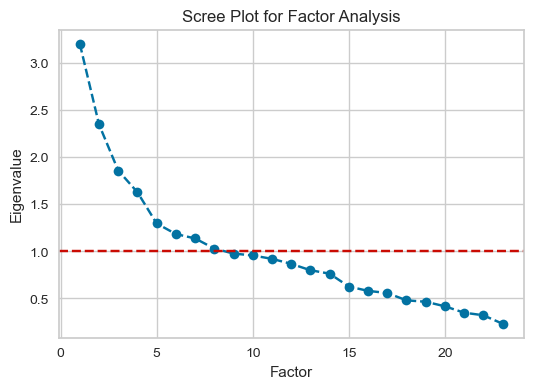

In [45]:
# Apply onehotencoding
categorical_cols = df_processed.select_dtypes('category').columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = encoder.fit_transform(df_processed[categorical_cols])
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))

# Combine numerical and encoded categorical data
df_numeric = df_processed.drop(columns=categorical_cols)
df_final = pd.concat([df_numeric, encoded_cats_df], axis=1)

# # Standardize the data before applying FAMD
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df_final)

# Apply Factor Analysis
fa = FactorAnalyzer(n_factors=8, rotation='varimax')
fa.fit(df_final)

# Get Eigenvalues
ev, _ = fa.get_eigenvalues()

# Scree Plot
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(ev) + 1), ev, marker="o", linestyle="--")
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot for Factor Analysis')
# Keep factors with eigenvalues > 1
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

In [47]:
cumulative_variance = np.cumsum(ev) / np.sum(ev)
print(cumulative_variance)

[0.13928334 0.24132655 0.32210692 0.39287215 0.44921487 0.50068536
 0.55013206 0.59490221 0.63736567 0.67896513 0.71899421 0.75672243
 0.79150278 0.82469162 0.85194622 0.87719588 0.90146467 0.92234997
 0.94258702 0.96072623 0.97591326 0.98990756 1.        ]


From the plot above: 
 - elbow point: 4-6 factors
 - kaiser ceiteria: around 8 factors have eigenvalues clearly larger than 1
 - based on the criteria above and the cummulative variance explained by the factors, might need to choose 8 factors for the study, which explain 59.49% vairance in the data

In [49]:
# Get Factor Loadings
factor_loadings = pd.DataFrame(fa.loadings_, index=df_final.columns, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5', 'Factor 6', 'Factor 7', 'Factor 8'])
factor_loadings

Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  \
cap-diameter            -0.050670  0.777826 -0.025128 -0.040458  0.090349   
cap-shape                0.035670  0.012369  0.083141  0.184100 -0.066901   
cap-surface              0.141155 -0.002853  0.163648 -0.047902  0.815920   
cap-color                0.008330 -0.053053  0.094805 -0.176816  0.024779   
does-bruise-or-bleed     0.011003  0.135560 -0.022685 -0.042992  0.084067   
gill-attachment          0.213458  0.195356  0.723595  0.138901 -0.074468   
gill-spacing             0.073558 -0.121005  0.443717  0.046820 -0.031448   
gill-color               0.160012 -0.010754  0.379871  0.114226  0.001525   
stem-height             -0.219069  0.568590 -0.219595 -0.145271 -0.004490   
stem-width              -0.009300  0.848641  0.254097 -0.156636  0.014988   
stem-root               -0.101213 -0.052038  0.284463  0.552468  0.013734   
stem-surface             0.074210 -0.074425  0.055255  0.635353 -0.002397   
stem-color               0.154881 -0.106160  0.054056  0.470497 -0.002800   
veil-type                0.780812 -0.080236  0.125795  0.038889  0.046591   
veil-color               0.744146 -0.007009 -0.002886  0.051203  0.109347   
has-ring                 0.374281 -0.117890  0.211651 -0.006364 -0.097791   
ring-type                0.592211 -0.038486  0.046453  0.058539  0.080924   
spore-print-color        0.024190  0.025780  0.095286  0.186968  0.137714   
habitat                  0.100440 -0.135984 -0.078622 -0.063783  0.033574   
season                   0.029150 -0.027541  0.011838  0.004012 -0.049482   
class                   -0.021561  0.177338  0.072394 -0.253861 -0.106944   
cap-surface_missing     -0.040409 -0.030414  0.147934 -0.058602 -0.416657   
gill-attachment_missing -0.114208 -0.103086 -0.207467 -0.107813 -0.027427   

                         Factor 6  Factor 7  Factor 8  
cap-diameter             0.061543 -0.138047  0.153561  
cap-shape                0.707494  0.091197  0.100794  
cap-surface              0.068992  0.053367  0.062807  
cap-color                0.146554 -0.047855 -0.085748  
does-bruise-or-bleed     0.022170 -0.155238  0.473511  
gill-attachment          0.016593 -0.213938  0.125642  
gill-spacing             0.377165 -0.115669 -0.346551  
gill-color               0.234420  0.202329  0.040250  
stem-height             -0.247910  0.060735 -0.010733  
stem-width               0.029627 -0.008770  0.125189  
stem-root                0.009188  0.090233 -0.002586  
stem-surface             0.237288 -0.139837 -0.281667  
stem-color               0.066200  0.012943  0.072572  
veil-type                0.054368 -0.085824  0.001343  
veil-color               0.052472 -0.091200 -0.010930  
has-ring                 0.081156 -0.128325  0.111784  
ring-type               -0.053884  0.189240 -0.084892  
spore-print-color       -0.045531  0.535448 -0.110075  
habitat                  0.026444 -0.063241 -0.221947  
season                   0.026142 -0.006948  0.068176  
class                   -0.053782 -0.171242 -0.054645  
cap-surface_missing      0.072881 -0.041893  0.041474  
gill-attachment_missing  0.093846  0.509539 -0.002814

In [58]:
# Fit the data with chosen number of factors
num_factors = 8
fa = FactorAnalyzer(n_factors=num_factors, rotation='varimax')
fa.fit(df_final)
# Transform the dataset to the reduced-dimension space
df_reduced = fa.transform(df_final)
# Convert to DataFrame
df_reduced = pd.DataFrame(df_reduced, columns=[f'Factor_{i+1}' for i in range(num_factors)])
df_reduced.head()

C:\Users\RY-LU\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\RY-LU\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Factor_1  Factor_2  Factor_3  Factor_4  Factor_5  Factor_6  Factor_7  \
0 -3.573308  1.232247 -1.402353 -0.422350 -0.411746 -0.686414 -0.420536   
1 -3.563664  1.425002 -1.471520 -0.409639 -0.423847 -0.675322 -0.422114   
2 -3.575665  1.247979 -1.385002 -0.449730 -0.433690 -0.740661 -0.358628   
3 -3.396021  1.060752 -1.333174 -0.461413 -0.164019 -0.397489 -0.210022   
4 -3.388983  1.199761 -1.325822 -0.445471 -0.124944 -0.730839 -0.237708   

   Factor_8  
0 -0.112298  
1 -0.079582  
2 -0.152393  
3 -0.078615  
4 -0.163809

### Reapply custering methods

In [70]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [72]:
# Load preprocessed data (assuming df_processed exists)
# X = df_processed.drop('class', axis=1)  # Exclude target variable

# 1. Preprocessing for Clustering
# -------------------------------------------------
# Convert categorical features to numeric (if not already done)
# categorical_cols = df_processed.select_dtypes(['category', 'object']).columns
# for col in categorical_cols:
#     df_processed[col] = pd.factorize(df_processed[col])[0]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_reduced)

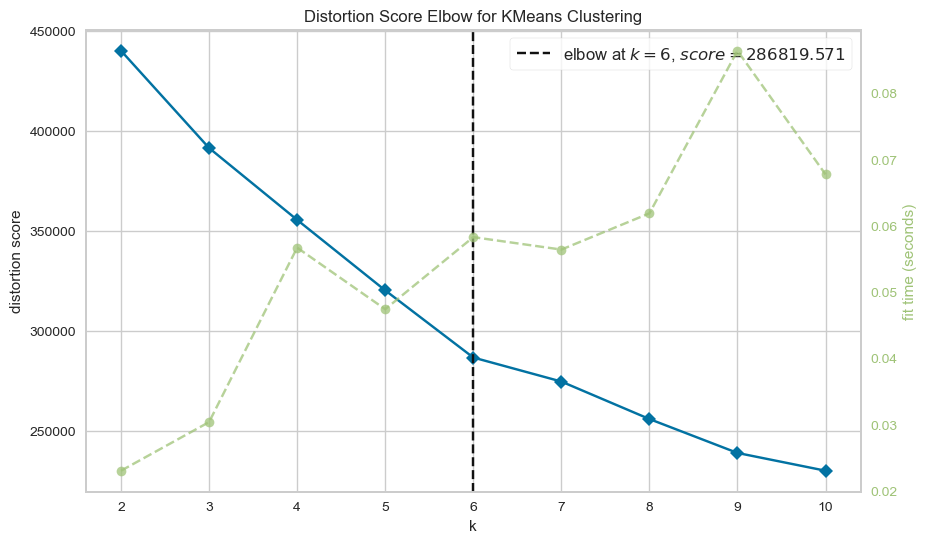

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [80]:
# 2. K-Means Clustering with Optimal K
# -------------------------------------------------
# Elbow Method
plt.figure(figsize=(10,6))
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2,11))
visualizer.fit(X_scaled)
visualizer.show()

# # Silhouette Analysis
# silhouette_scores = []
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     preds = kmeans.fit_predict(X_scaled)
#     score = silhouette_score(X_scaled, preds)
#     silhouette_scores.append(score)

# plt.figure(figsize=(10,6))
# plt.plot(range(2,11), silhouette_scores, marker='o')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Analysis')
# plt.show()

In [82]:
# Final K-means
optimal_k = 6  # Update based on elbow/silhouette results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

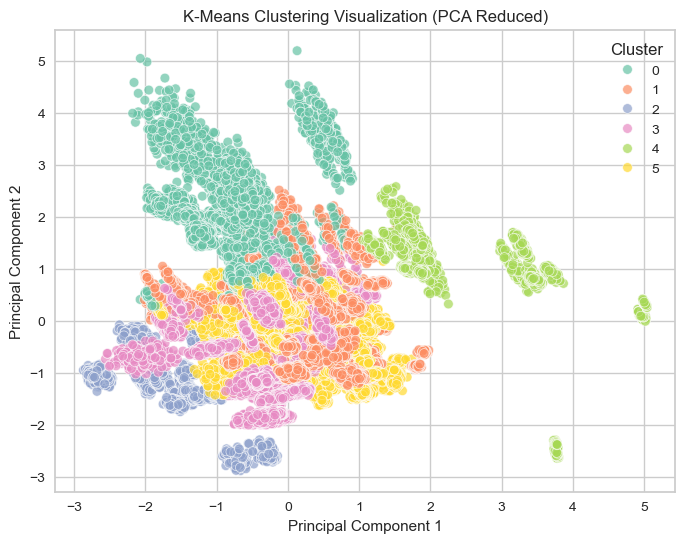

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce data to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set2', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Visualization (PCA Reduced)')
plt.legend(title='Cluster')
plt.show()

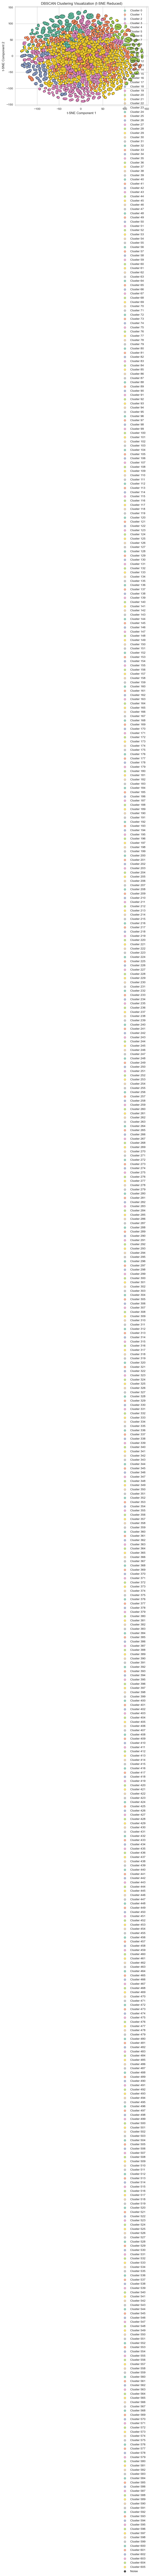

In [108]:
from sklearn.manifold import TSNE
# Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
for label in unique_labels:
    if label == -1:
        color = 'black'  # Noise points in black
        label_name = 'Noise'
    else:
        color = palette[label]
        label_name = f'Cluster {label}'
    
    plt.scatter(X_tsne[kmeans_labels == label, 0], X_tsne[kmeans_labels == label, 1], 
                label=label_name, alpha=0.7, edgecolors='k', color=color)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('DBSCAN Clustering Visualization (t-SNE Reduced)')
plt.legend()
plt.show()

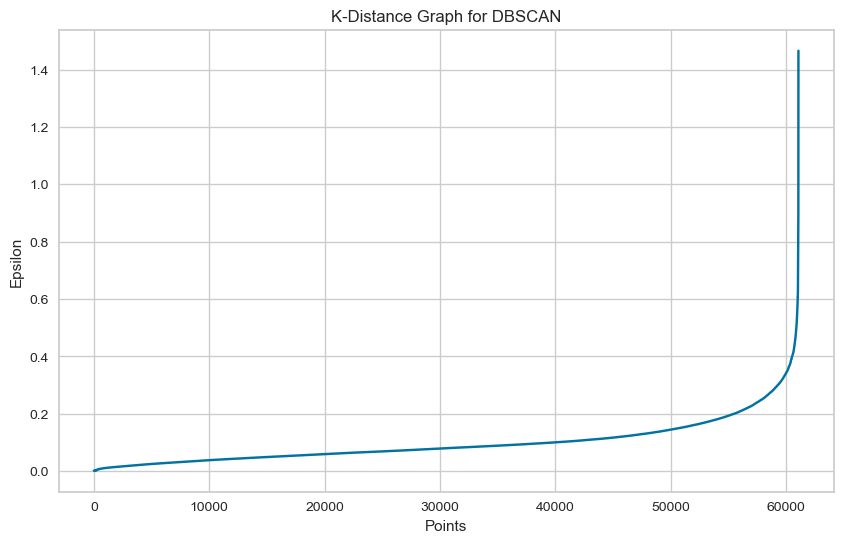

In [84]:
# 3. DBSCAN Clustering
# -------------------------------------------------
# Find optimal eps using k-distance graph
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5)
nbrs = nn.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
distances = np.sort(distances[:,4], axis=0)

plt.figure(figsize=(10,6))
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Epsilon')
plt.title('K-Distance Graph for DBSCAN')
plt.show()

In [86]:
# Final DBSCAN (adjust eps based on knee point)
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

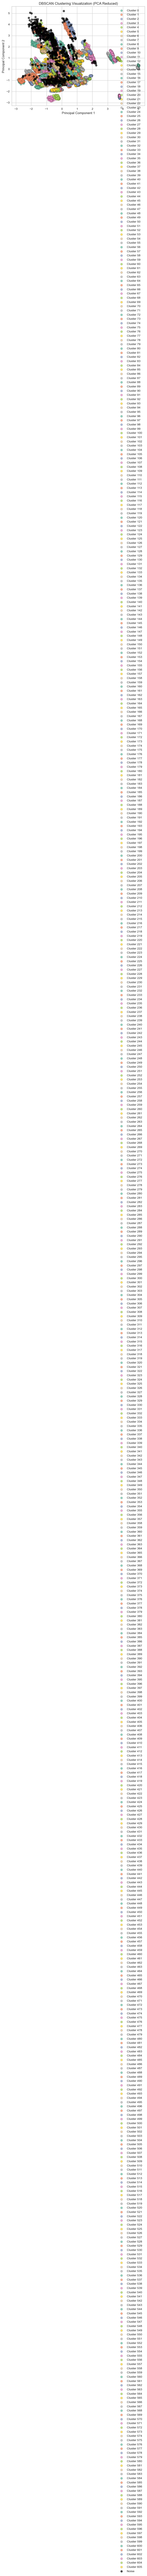

In [104]:
# Identify noise points (-1 label)
unique_labels = set(dbscan_labels)
palette = sns.color_palette("Set2", len(unique_labels) - 1)  # Exclude noise color

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
for label in unique_labels:
    if label == -1:
        color = 'black'  # Noise points in black
        label_name = 'Noise'
    else:
        color = palette[label]
        label_name = f'Cluster {label}'
    
    plt.scatter(X_pca[dbscan_labels == label, 0], X_pca[dbscan_labels == label, 1], 
                label=label_name, alpha=0.7, edgecolors='k', color=color)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering Visualization (PCA Reduced)')
plt.legend()
plt.show()

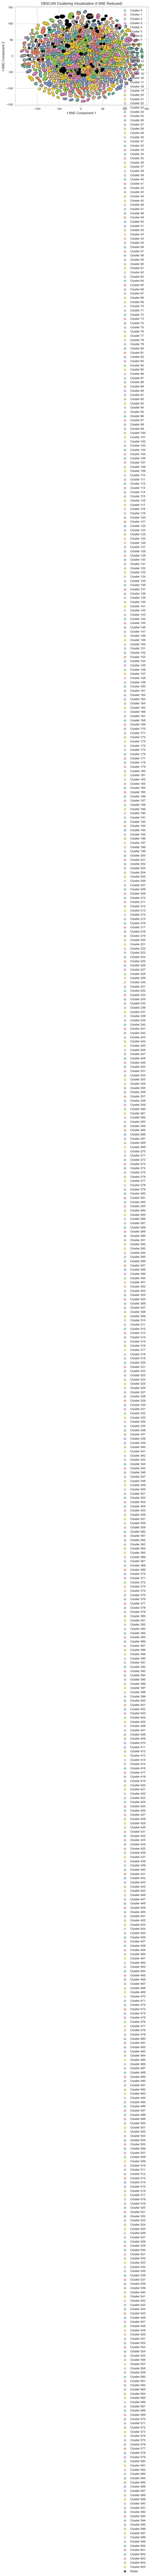

In [106]:
from sklearn.manifold import TSNE
# Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
for label in unique_labels:
    if label == -1:
        color = 'black'  # Noise points in black
        label_name = 'Noise'
    else:
        color = palette[label]
        label_name = f'Cluster {label}'
    
    plt.scatter(X_tsne[dbscan_labels == label, 0], X_tsne[dbscan_labels == label, 1], 
                label=label_name, alpha=0.7, edgecolors='k', color=color)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('DBSCAN Clustering Visualization (t-SNE Reduced)')
plt.legend()
plt.show()

In [88]:
# Silhouette Score (already implemented)
print(f"K-means Silhouette: {silhouette_score(X_scaled, kmeans_labels):.6f}")

# Davies-Bouldin Index (lower = better)
print(f"K-means Davies-Bouldin: {davies_bouldin_score(X_scaled, kmeans_labels):.6f}")

# Calinski-Harabasz (higher = better)
print(f"K-means Calinski-Harabasz: {calinski_harabasz_score(X_scaled, kmeans_labels):.6f}")

K-means Silhouette: 0.194387
K-means Davies-Bouldin: 1.557189
K-means Calinski-Harabasz: 8589.642125


# Interpretation of Reduced Clustering Metrics for Mushroom Dataset
## Kmeans

## 1. Silhouette Score: **0.194387**
- **Range**: -1 (poor clustering) to 1 (excellent clustering) (worsen with FA)
- **Interpretation**:
  - Weak but positive cluster separation
  - Clusters have some structure but significant overlap
- **Biological Context**:
  - Mushrooms likely share characteristics across species/clusters (e.g., cap shape, habitat)
  - Common in natural datasets with fuzzy taxonomic boundaries

---

## 2. Davies-Bouldin Index: **1.557189**
- **Range**: 0 (best) to ∞ (worst) (imrpoved with FA)
- **Interpretation**:
  - Moderate cluster quality
  - Clusters are distinguishable but not sharply separated
- **Biological Context**:
  - Suggests ecological groups exist but with overlapping features
  - Example: Mushrooms from different species growing in similar habitats

---

## 3. Calinski-Harabasz Score: **8589.642125**
- **Range**: Higher = better (no upper bound) (improved with FA)
- **Interpretation**:
  - Relatively high value for dataset size (61k samples)
  - Indicates dense, compact clusters relative to overall data spread
- **Biological Context**:
  - Strong species-level variation dominates clustering
  - Weak within-species variation (e.g., minor cap color differences)


In [92]:
# Filter out noise points (-1 labels)
valid_mask = dbscan_labels != -1

if sum(valid_mask) > 0:  # Only calculate if meaningful clusters exist
    print(f"\nDBSCAN Silhouette: {silhouette_score(X_scaled[valid_mask], dbscan_labels[valid_mask]):.3f}")
    print(f"DBSCAN Noise Points: {(dbscan_labels == -1).mean():.1%}")
else:
    print("DBSCAN failed to find meaningful clusters")


DBSCAN Silhouette: 0.536
DBSCAN Noise Points: 1.5%


In [98]:
# !pip install hdbscan

In [100]:
import hdbscan

hdb = hdbscan.HDBSCAN(min_cluster_size=500, gen_min_span_tree=True)
hdb_labels = hdb.fit_predict(X_scaled)
print(f"Clusters: {hdb_labels.max() + 1}")
print(f"Noise %: {(hdb_labels == -1).mean():.1%}")

C:\Users\RY-LU\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\RY-LU\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Clusters: 2
Noise %: 2.8%
